In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sb
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Veriyi yükleme
data = pd.read_csv(r"data.csv")

# Görüntüleri yükleme ve işlemleme
height, width = 128, 128
X = np.empty((data.shape[0], height, width, 3))
for i in range(data.shape[0]):
    img = load_img(r"{}/{}.jpg".format(data.loc[i, 'label'], data.loc[i, 'images_id']), target_size=(height, width))
    X[i] = img_to_array(img)

# Etiketleri işlemleme
labels = data.label.unique()
labels = {labels[i]: i for i in range(labels.size)}

def changeLabels(x):
    return labels[x]

y = data.label.apply(changeLabels)
y = to_categorical(y, len(labels))
y = y.astype(int)

# Veriyi eğitim, doğrulama ve test setlerine bölme
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=8)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=8)

# Model oluşturma fonksiyonu
def create_model(optimizer):
    model = Sequential()
    model.add(Input(shape=(height, width, 3)))
    model.add(Conv2D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(32, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(32, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.45))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Optimizasyon algoritmalarının listesi
optimizers = {
    'SGD': SGD(),
    'RMSprop': RMSprop(),
    'Adagrad': Adagrad(),
    'Adadelta': Adadelta(),
    'Adam': Adam(),
    'Adamax': Adamax()
}

# Eğitim sonuçlarını saklamak için dictionary
results = {}

EPOCHS = 15

# Modelleri eğitme ve sonuçları saklama
for name, optimizer in optimizers.items():
    print(f"Training with {name} optimizer...")
    model = create_model(optimizer)
    history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_val, y_val), verbose=1)
    results[name] = history.history




Training with SGD optimizer...
Training with RMSprop optimizer...
Training with Adagrad optimizer...
Training with Adadelta optimizer...
Training with Adam optimizer...
Training with Adamax optimizer...


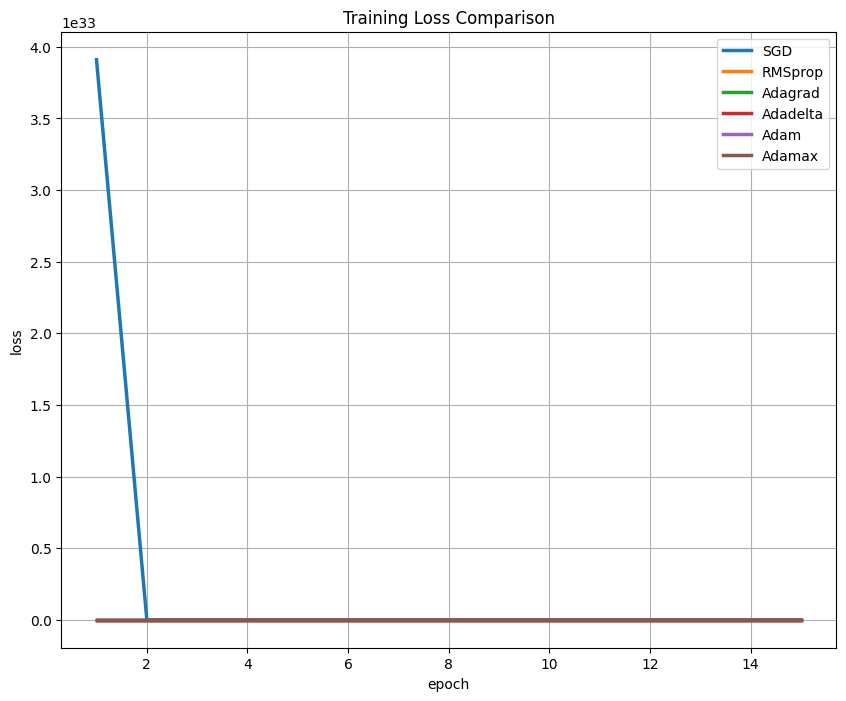

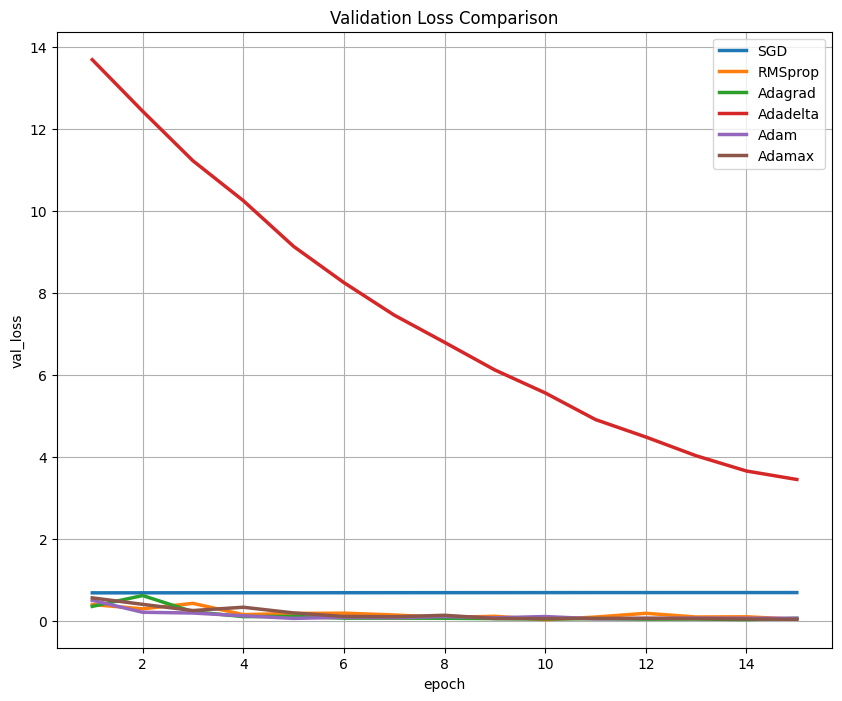

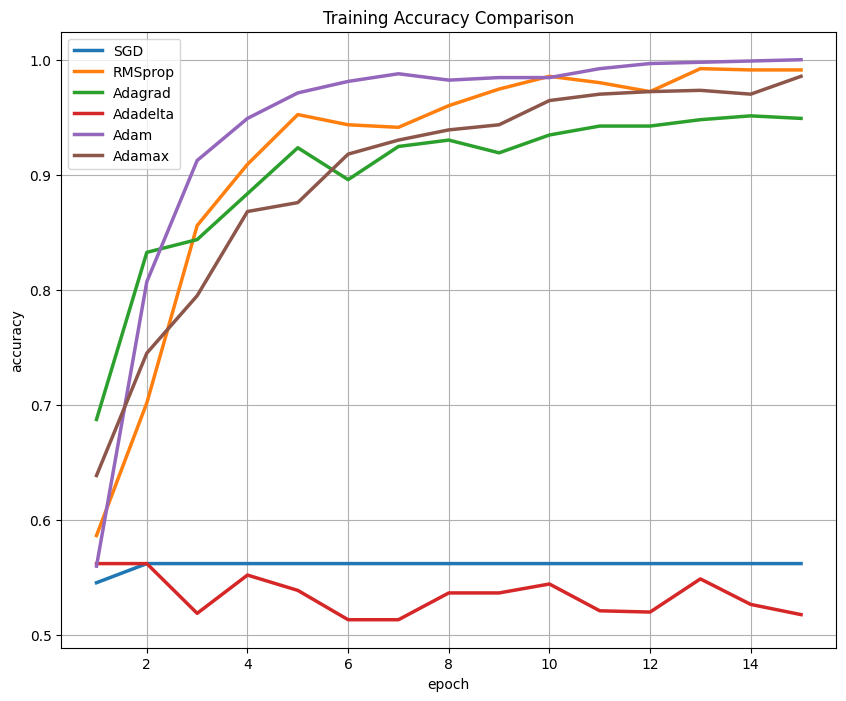

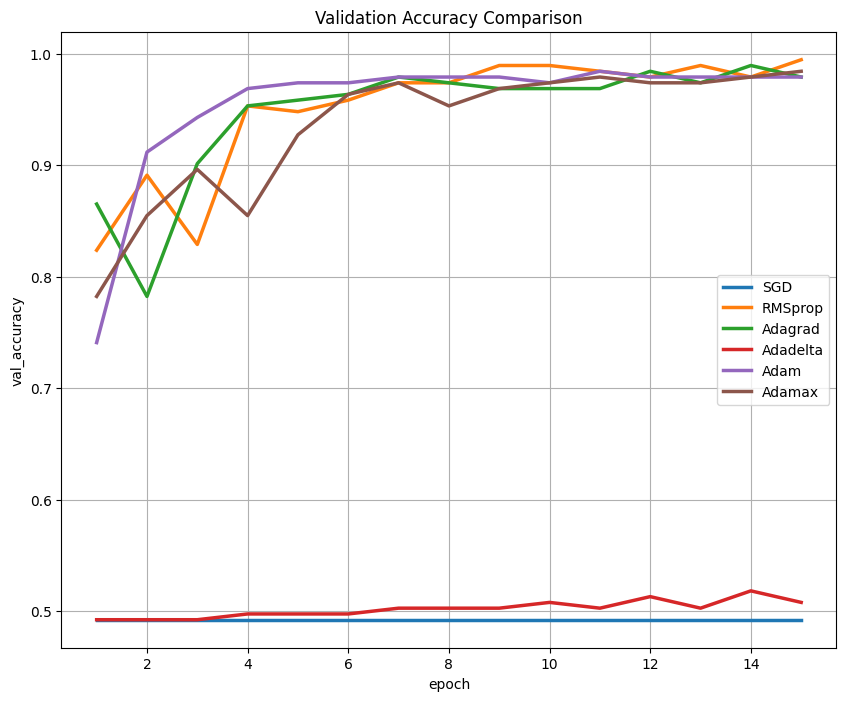

In [2]:
# Sonuçları görselleştirme
stats_df = pd.DataFrame()
for name, history in results.items():
    temp_df = pd.DataFrame(history)
    temp_df['epoch'] = range(1, EPOCHS + 1)
    temp_df['optimizer'] = name
    stats_df = pd.concat([stats_df, temp_df])

plot.figure(figsize=(10, 8))
sb.lineplot(data=stats_df, x='epoch', y='loss', hue='optimizer', linewidth=2.5)
plot.title("Training Loss Comparison")
plot.grid()
plot.legend()
plot.show()

plot.figure(figsize=(10, 8))
sb.lineplot(data=stats_df, x='epoch', y='val_loss', hue='optimizer', linewidth=2.5)
plot.title("Validation Loss Comparison")
plot.grid()
plot.legend()
plot.show()

plot.figure(figsize=(10, 8))
sb.lineplot(data=stats_df, x='epoch', y='accuracy', hue='optimizer', linewidth=2.5)
plot.title("Training Accuracy Comparison")
plot.grid()
plot.legend()
plot.show()

plot.figure(figsize=(10, 8))
sb.lineplot(data=stats_df, x='epoch', y='val_accuracy', hue='optimizer', linewidth=2.5)
plot.title("Validation Accuracy Comparison")
plot.grid()
plot.legend()
plot.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sb
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical






In [ ]:
# Veriyi yükleme
data = pd.read_csv(r"data.csv")

# Görüntüleri yükleme ve işlemleme
height, width = 128, 128
X = np.empty((data.shape[0], height, width, 3), dtype=np.uint8)  # Veri tipini float32 olarak ayarladık
for i in range(data.shape[0]):
    img = load_img(r"{}/{}.jpg".format(data.loc[i, 'label'], data.loc[i, 'images_id']), target_size=(height, width))
    X[i] = img_to_array(img)

# Etiketleri işlemleme
labels = data.label.unique()
labels = {labels[i]: i for i in range(labels.size)}

def changeLabels(x):
    return labels[x]

y = data.label.apply(changeLabels)
y = to_categorical(y, len(labels))
y = y.astype(int)

# Veriyi eğitim, doğrulama ve test setlerine bölme
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=8)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=8)

In [ ]:
# Model oluşturma fonksiyonu
def create_model(optimizer):
    model = Sequential()
    model.add(Input(shape=(height, width, 3)))
    model.add(Conv2D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(32, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(32, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.45))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Optimizasyon algoritmalarının listesi
optimizers = {
    'SGD': SGD(),
    'RMSprop': RMSprop(),
    'Adagrad': Adagrad(),
    'Adadelta': Adadelta(),
    'Adam': Adam(),
    'Adamax': Adamax()
}

# Eğitim sonuçlarını saklamak için dictionary
results = {}

EPOCHS = 15

# Modelleri eğitme ve sonuçları saklama
for name, optimizer in optimizers.items():
    print(f"Training with {name} optimizer...")
    model = create_model(optimizer)
    history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_val, y_val), verbose=1)
    results[name] = history.history

In [ ]:
# Sonuçları görselleştirme
stats_df = pd.DataFrame()
for name, history in results.items():
    temp_df = pd.DataFrame(history)
    temp_df['epoch'] = range(1, EPOCHS + 1)
    temp_df['optimizer'] = name
    stats_df = pd.concat([stats_df, temp_df])

plot.figure(figsize=(10, 8))
sb.lineplot(data=stats_df, x='epoch', y='loss', hue='optimizer', linewidth=2.5)
plot.title("Training Loss Comparison")
plot.grid()
plot.legend()
plot.show()

plot.figure(figsize=(10, 8))
sb.lineplot(data=stats_df, x='epoch', y='val_loss', hue='optimizer', linewidth=2.5)
plot.title("Validation Loss Comparison")
plot.grid()
plot.legend()
plot.show()

plot.figure(figsize=(10, 8))
sb.lineplot(data=stats_df, x='epoch', y='accuracy', hue='optimizer', linewidth=2.5)
plot.title("Training Accuracy Comparison")
plot.grid()
plot.legend()
plot.show()

plot.figure(figsize=(10, 8))
sb.lineplot(data=stats_df, x='epoch', y='val_accuracy', hue='optimizer', linewidth=2.5)
plot.title("Validation Accuracy Comparison")
plot.grid()
plot.legend()
plot.show()

# Test seti üzerinde performansı değerlendirme
test_results = {}

for name, optimizer in optimizers.items():
    model = create_model(optimizer)
    model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_val, y_val), verbose=0)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    test_results[name] = {'test_loss': test_loss, 'test_accuracy': test_accuracy}

test_results_df = pd.DataFrame(test_results).T
print(test_results_df)